# Quick example to fit a baseline


In [1]:

import numpy as np
from matplotlib import pyplot as plt
import rampy

# Creating a signal

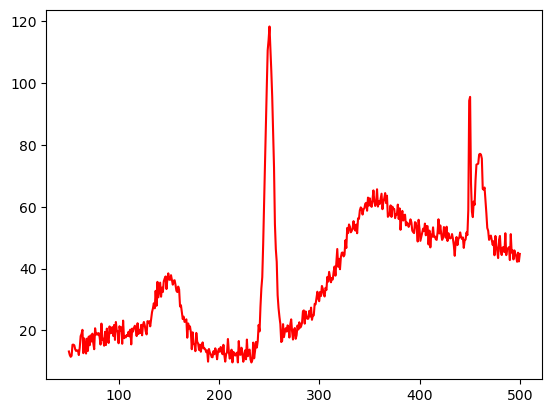

In [2]:
nb_points  =500
x = np.linspace(50, 500, nb_points)

# gaussian peaks
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/5.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/1.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/30.0)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# background: a large sin distortion + linear 
bkg = 10*np.sin(x/50) + 0.1*x

#noise
noise = 2.0 * np.random.normal(size=nb_points)

#observation
y = p1 + p2 + p3 + p4 + p5 + noise +bkg

plt.plot(x,y,"r-")

# Now using different baselines to retrieve the true background

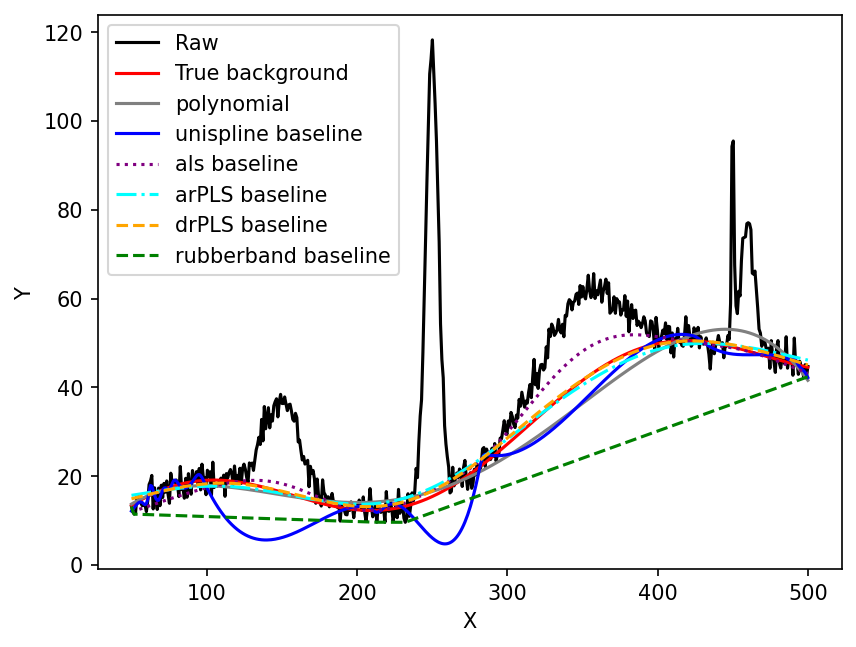

In [3]:
# need to define some fitting regions for the spline
roi = np.array([[0,100],[200,220],[280, 290],[420,430],[480,500]])

# calculating the baselines
ycalc_poly, base_poly = rampy.baseline(x, y, roi, 'poly', polynomial_order=4)
#ycalc_gcvspl, base_gcvspl = rampy.baseline(x,y,roi,'gcvspline',s=0.1 ) # activate if you have installed gcvspline
ycalc_uni, base_uni = rampy.baseline(x, y, roi, 'unispline', s=1e0)
ycalc_als, base_als = rampy.baseline(x, y, roi, 'als', lam=10**5, p=0.05)
ycalc_arpls, base_arpsl = rampy.baseline(x, y, roi, 'arPLS', lam=10**6, ratio=0.001)
ycalc_drpls, base_drpsl = rampy.baseline(x, y, roi, 'drPLS')
ycalc_rubberband, base_rubberband = rampy.baseline(x, y, roi, 'rubberband')

# doing the figure
plt.figure(dpi=150)
plt.plot(x, y, "k-", label="Raw")
plt.plot(x, bkg, "r-", label="True background")

plt.plot(x, base_poly, "-", color="grey", label="polynomial")
plt.plot(x, base_uni, "b-", label="unispline baseline")
#plt.plot(x,base_gcvspl,"-",color="orange",label="gcvspline baseline") # activate if you have installed gcvspline
plt.plot(x, base_als, ":", color="purple", label="als baseline")
plt.plot(x, base_arpsl, "-.", color="cyan", label="arPLS baseline")
plt.plot(x, base_drpsl, "--", color="orange", label="drPLS baseline")
plt.plot(x, base_rubberband, "--", color="green", label="rubberband baseline")

plt.xlabel("X")
plt.ylabel("Y")

plt.legend()